<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Lab: Transfer Learning Implementation 


##### Estimated time needed:  30 minutes


In this lab, you will learn to implement transfer learning using a pre-trained model in Keras.

#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.



### Step-by-Step Guide: 

#### Step 1: Setup the Environment 

Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
# !pip install tensorflow==2.16.2 matplotlib==3.9.1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Explanation:
- `tensorflow` is the main library for machine learning in Python.
- `Sequential` is used to create a model with a linear stack of layers.
- `Dense` and `Flatten` are types of layers that we will use in our model.


#### Step 2: Load Pre-trained Model 


In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

2025-08-22 22:47:57.156187: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-22 22:47:57.156477: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-22 22:47:57.156484: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-22 22:47:57.156741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-22 22:47:57.156764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Step 3: Create and Compile the Model 


In [3]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Create Placeholder Images**


In [4]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")


Sample images created in 'sample_data/'


#### Step 4: Train the Model 


In [5]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-08-22 22:48:07.723313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7165
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.5000 - loss: 9.6805
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.5000 - loss: 8.2454
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - accuracy: 0.5000 - loss: 4.9424
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - accuracy: 0.5000 - loss: 2.1457
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - accuracy: 1.0000 - loss: 0.1990
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - accuracy: 1.0000 - loss: 0.1324
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step - accuracy: 0.5000 - loss: 0.8451
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.5000 - loss: 1.7255


#### Step 5: Fine-Tune the Model 


In [6]:
# Unfreeze the top layers of the base model 

for layer in base_model.layers[-4:]:
    layer.trainable = True 

# Compile the model again 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model again 
model.fit(train_generator, epochs=10) 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 2.3744
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5000 - loss: 0.6883
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.5000 - loss: 0.8608
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 1.1907
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 0.6063
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 1.0593
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 0.5696
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5000 - loss: 0.8308
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5000 - loss: 0.7013
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.5000 - loss: 0.5915


### Exercises


#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # mnust specify validation_split if u wanna make a validation_generator

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

history = model.fit(train_generator, validation_data=validation_generator, epochs = 10)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.3561 - val_accuracy: 0.5000 - val_loss: 0.4618
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5000 - loss: 0.4618 - val_accuracy: 1.0000 - val_loss: 0.2370
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - accuracy: 1.0000 - loss: 0.2370 - val_accuracy: 1.0000 - val_loss: 0.1687
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step - accuracy: 1.0000 - loss: 0.1687 - val_accuracy: 1.0000 - val_loss: 0.1452
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - accuracy: 1.0000 - loss: 0.1452 - val_accuracy: 1.0000 - val_loss: 0.0688
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0337
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - accuracy: 1.0000 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 

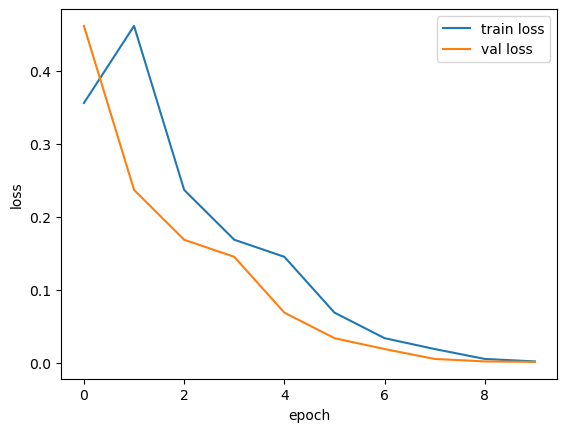

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<details>
<summary>Click here for solution</summary> </br>

```python
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Exercise 2: Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9331 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 0.0699
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 0.0699 - val_accuracy: 0.5000 - val_loss: 1.8068
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.5000 - loss: 1.8068 - val_accuracy: 0.5000 - val_loss: 22.6726
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5000 - loss: 22.6726 - val_accuracy: 0.5000 - val_loss: 0.6830
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5000 - loss: 0.6830 - val_accuracy: 1.0000 - val_loss: 0.3748
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 1.0000 - loss: 0.3748 - val_accuracy: 1.0000 - val_loss: 0.3213
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 1.0000 - loss: 0.3213 - val_accuracy: 1.0000 - val_loss: 

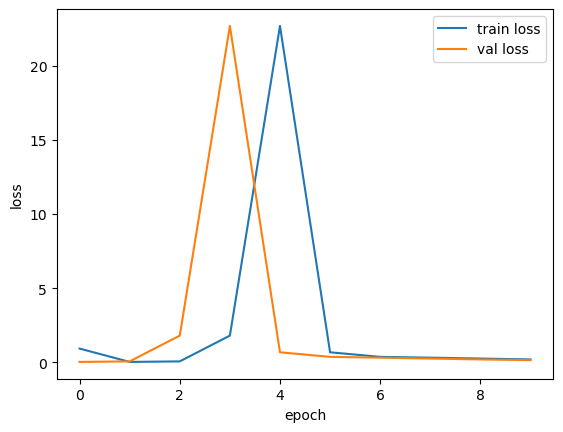

In [ ]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, epochs = 10)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.8078 - val_accuracy: 0.5000 - val_loss: 0.5913
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5000 - loss: 0.5913 - val_accuracy: 0.5000 - val_loss: 2.1435
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.5000 - loss: 2.1435 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6937 - val_accuracy: 1.0000 - val_loss: 0.6693
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - accuracy: 1.0000 - loss: 0.6693 - val_accuracy: 0.5000 - val_loss: 2.0386
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - accuracy: 0.5000 - loss: 2.0386 - val_accuracy: 0.5000 - val_loss: 0.5386
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - accuracy: 0.5000 - loss: 0.5386 - val_accuracy: 0.5000 - val_loss: 0.4386
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - accuracy: 0.5000 - loss: 0.4386 - val_accuracy: 0.5000 - val_loss: 0.411

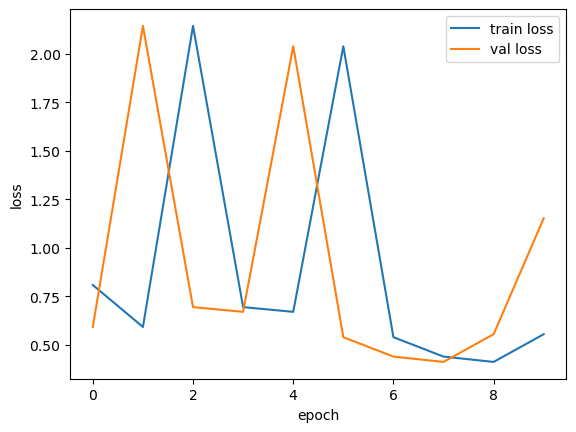

In [15]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, epochs = 10)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Exercise 3: Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


In [16]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test acc: {test_accuracy}; Test loss: {test_loss}")

Found 20 images belonging to 2 classes.


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.5000 - loss: 1.1519
Test acc: 0.5; Test loss: 1.151888132095337


<details>
<summary>Click here for solution</summary> </br>

```python
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


### Summary

By completing these exercises, students will:

1. Visualize the training and validation loss to gain insights into the training process.
2. Experiment with different optimizers to understand their impact on model performance.
3. Evaluate the fine-tuned model on an unseen test set to assess its generalization capability.


#### Conclusion

Congratulations! In this lab, you have successfully implemented transfer learning using a pre-trained model in Keras. This lab exercise demonstrated how to train and fine-tune the model by unfreezing some of the layers.


Copyright © IBM Corporation. All rights reserved.
